In [11]:
import numpy as np
import xarray as xr
import matplotlib as mlp
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


In [45]:
ls Project/

Ghana.dbf                              PDIR_Ghana_2022-08-23034640am_2011.nc
Ghana.shp                              PDIR_Ghana_2022-08-23034640am_2012.nc
Ghana.shx                              PDIR_Ghana_2022-08-23034640am_2013.nc
info.txt                               PDIR_Ghana_2022-08-23034640am_2014.nc
PDIR_Ghana_2022-08-23034640am_2001.nc  PDIR_Ghana_2022-08-23034640am_2015.nc
PDIR_Ghana_2022-08-23034640am_2002.nc  PDIR_Ghana_2022-08-23034640am_2016.nc
PDIR_Ghana_2022-08-23034640am_2003.nc  PDIR_Ghana_2022-08-23034640am_2017.nc
PDIR_Ghana_2022-08-23034640am_2004.nc  PDIR_Ghana_2022-08-23034640am_2018.nc
PDIR_Ghana_2022-08-23034640am_2005.nc  PDIR_Ghana_2022-08-23034640am_2019.nc
PDIR_Ghana_2022-08-23034640am_2006.nc  PDIR_Ghana_2022-08-23034640am_2020.nc
PDIR_Ghana_2022-08-23034640am_2007.nc  PDIR_Ghana_2022-08-23034640am_2021.nc
PDIR_Ghana_2022-08-23034640am_2008.nc  read_netcdf.m
PDIR_Ghana_2022-08-23034640am_2009.nc  read_netcdf.py
PDIR_Ghana_2022-08-23034640am_2010.nc


LOAD DATA
=

In [3]:
#This will read all the data in the folder Project with the extension .nc
data=xr.open_mfdataset('Project/PDI*.nc').rename({'datetime':'time'})
data=data['precip'].where(data['precip']!=-99)# This one remove all the data 
# containing -99 or no values to nan.

In [44]:
data

<xarray.DataArray 'precip' (time: 7306, lat: 163, lon: 113)>
dask.array<where, shape=(7306, 163, 113), dtype=float64, chunksize=(366, 163, 113), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -3.28 -3.24 -3.2 -3.16 -3.12 ... 1.08 1.12 1.16 1.2
  * lat      (lat) float32 11.24 11.2 11.16 11.12 11.08 ... 4.88 4.84 4.8 4.76
  * time     (time) datetime64[ns] 2001-03-01 2001-03-02 ... 2021-03-01
Attributes:
    grid_mapping:  crs

Create a Julian Day(Day of year) Groupings 
=

In [4]:
day_data= data.mean(['lon','lat']).groupby('time.dayofyear')
#Tis will only craete the groupings from day 1 to 366 which is the Julian
#day representation

In [27]:
# day_data


Function for anomally computation and checking of data
=

In [68]:
 def stand(x,dim):
        g=(x-x.mean(dim=dim))
        return g  # This calculates the anomally
    
    
def if_check(p, grid=True):
    if grid ==True:
        p=p.where(p!=np.inf).where(p!=-np.inf)
        
    else:
        p[np.isinf(p)==True]=np.nan
        return p

    


In [37]:
# day_data.mean()

In [38]:
# list(day_data.groups.copy())

In [76]:
# av = if_check(day_data.mean(), grid=False)


In [75]:
av_data

<xarray.DataArray 'precip' (dayofyear: 366)>
dask.array<setitem, shape=(366,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

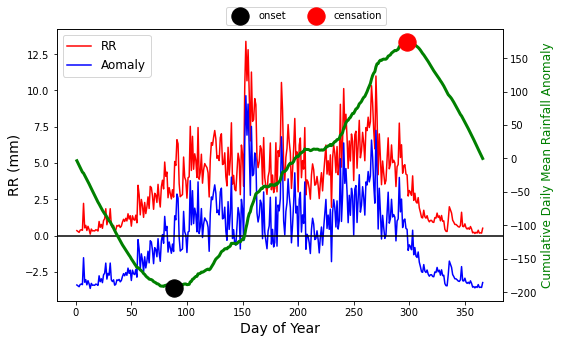

In [80]:
x=list(day_data.groups.copy())

fig, ax = plt.subplots(figsize=(8,5))

av_data =if_check(day_data.mean(),grid = False)

av_data.plot(ax = ax,color ='r', label='RR')

stand(av_data, dim='dayofyear').plot(ax=ax,color='b', label='Aomaly')

#legend
ax.legend(loc='upper left',fontsize=12)
ax.set_ylabel('RR (mm)',fontsize=14)
ax.set_xlabel('Day of Year', fontsize=14)

ax.axhline(y=0,color="k") # Horizontal black line at the zero y mark
 
# ax.axvline(x=0, color='k') Vectical blackline at the zero x mark

ax1=ax.twinx()
anom=stand(av_data,dim='dayofyear').cumsum()
ax1.plot(x,anom,color='g',lw=3)
ax1.set_ylabel('Cumulative Daily Mean Rainfall Anomaly', color='g', fontsize=12)

#Onset and Censation Dection
Anomaly= anom.values
dx=21
onset=[]; censation=[]
for i in range(dx, len(Anomaly)-dx):
    if np.min(Anomaly[i-dx:i+dx]) == Anomaly[i]:
        onset.append([i+1, Anomaly[i+1]])
    if np.max(Anomaly[i-dx:i+dx]) == Anomaly[i]:
         censation.append([i+1, Anomaly[i+1]])
        
ax1.scatter(np.copy(onset).T[0],np.copy(onset).T[1],300,color='k',zorder=5, label='onset')
ax1.scatter(np.copy(censation).T[0],np.copy(censation).T[1],300,color='r',zorder=5, label='censation')
ax1.legend(loc=1,ncol=2,bbox_to_anchor=(0.75,1.1))
plt.savefig('RR-ANOMAL.tiff')